In [159]:
import pandas as pd
df = pd.read_csv('desafio_indicium_imdb.csv')

In [160]:
df = pd.read_csv('desafio_indicium_imdb.csv')
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Movie_Age
0,The Godfather,1972.0,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,53.0
1,The Dark Knight,2008.0,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,17.0
2,The Godfather: Part II,1974.0,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,51.0
3,12 Angry Men,1957.0,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,68.0
4,The Lord of the Rings: The Return of the King,2003.0,U,201.0,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,22.0


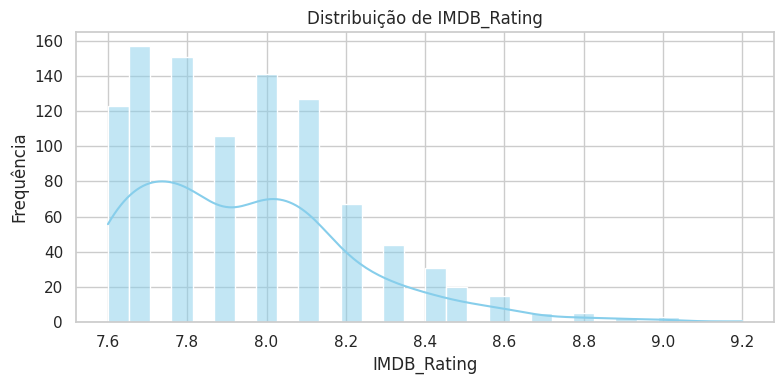

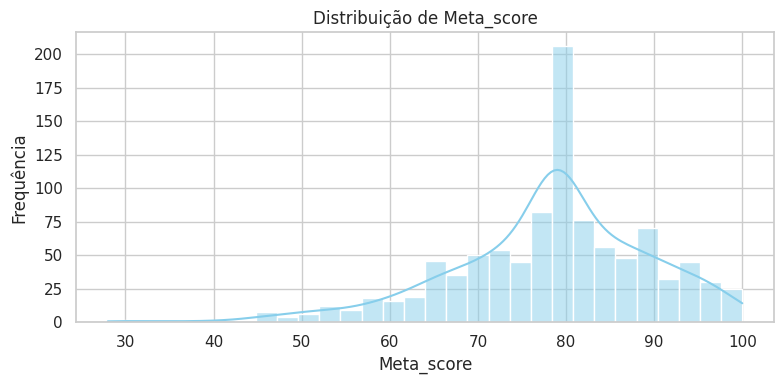

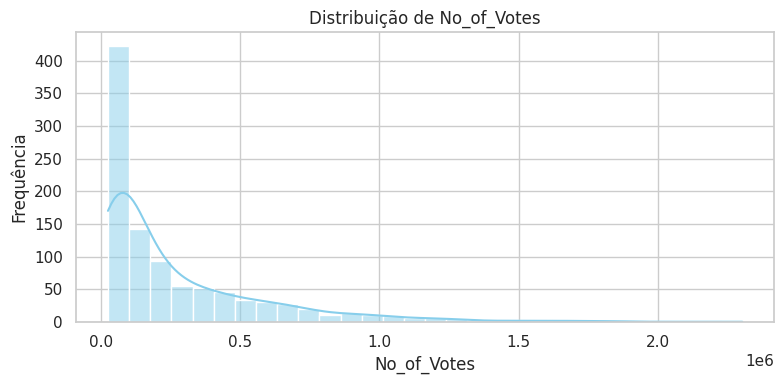

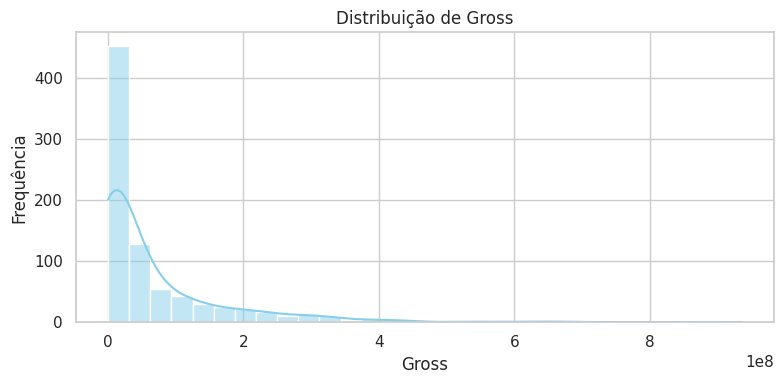

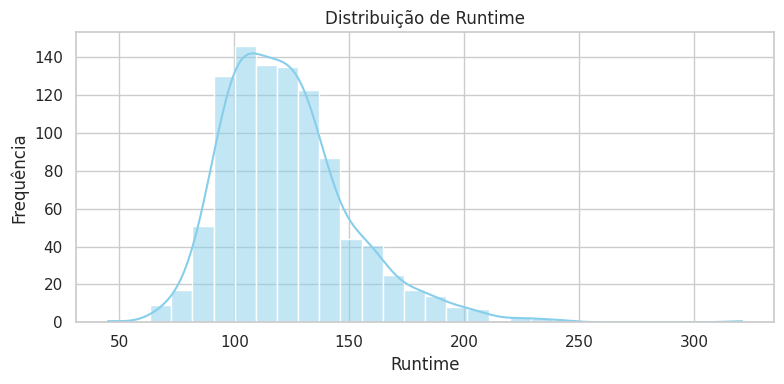

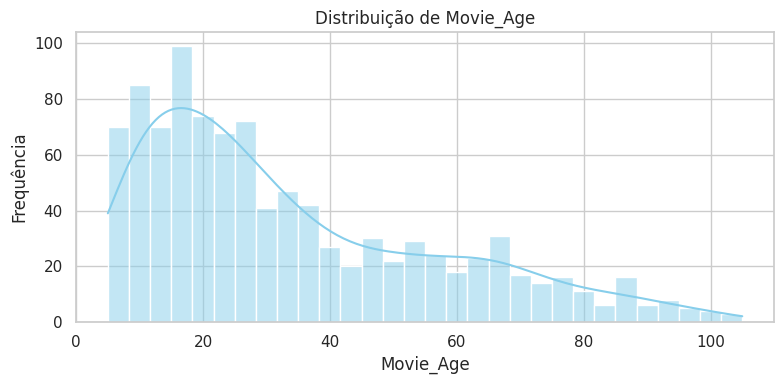

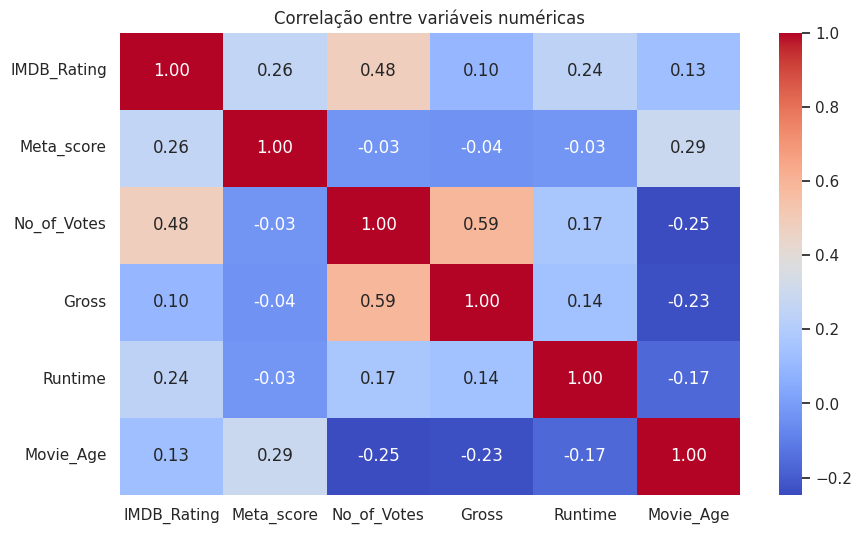

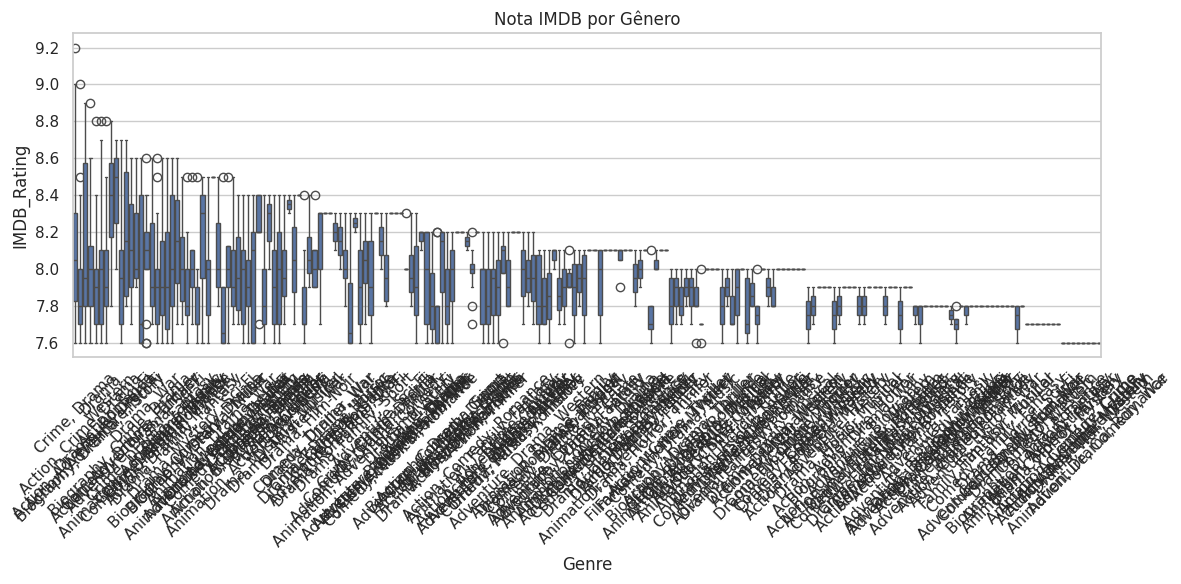

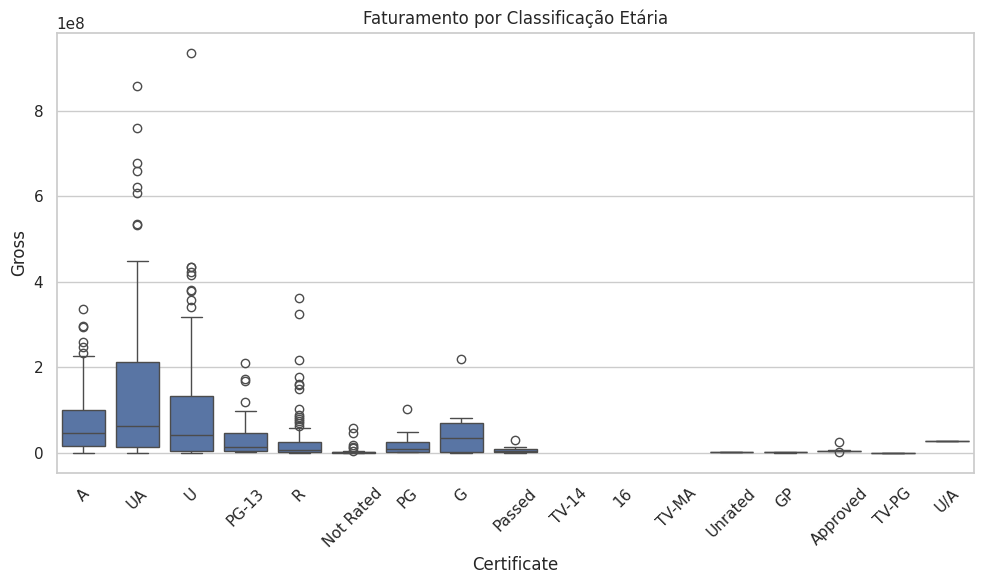

In [161]:
# Etapa 1 — Análise Exploratória (EDA)

# Histograma das variáveis numéricas
num_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime', 'Movie_Age']
sns.set(style="whitegrid")

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

# Heatmap de correlação
corr = df[num_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre variáveis numéricas')
plt.show()

# Boxplots por categoria
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='IMDB_Rating', data=df)
plt.xticks(rotation=45)
plt.title('Nota IMDB por Gênero')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Certificate', y='Gross', data=df)
plt.xticks(rotation=45)
plt.title('Faturamento por Classificação Etária')
plt.tight_layout()
plt.show()

In [162]:
# Etapa 2 — Modelagem Preditiva

# Seleção de variáveis
features = [
    'Released_Year', 'Certificate', 'Runtime', 'Genre', 'Meta_score',
    'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'
]
target = 'IMDB_Rating'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processamento
categorical = ['Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']
numerical = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']

preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median'))
    ]), numerical),

    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical)
])

# Pipeline completo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Treinamento
model.fit(X_train, y_train)

# Avaliação
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R²: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')

R²: 0.14
RMSE: 0.24


In [163]:
# Etapa 3 — Previsão para Filme Fictício e Filme Real

# Filme fictício
filme_exemplo = pd.DataFrame([{
    'Released_Year': 2025,
    'Certificate': 'PG-13',
    'Runtime': 130,
    'Genre': 'Action',
    'Meta_score': 78,
    'Director': 'Christopher Nolan',
    'Star1': 'Cillian Murphy',
    'Star2': 'Emily Blunt',
    'Star3': 'Matt Damon',
    'Star4': 'Robert Downey Jr.',
    'No_of_Votes': 450000,
    'Gross': 320000000
}])

nota_exemplo = model.predict(filme_exemplo)[0]
print(f'Nota IMDB prevista para o filme fictício: {nota_exemplo:.2f}')

# Filme real: Interstellar
filme_interstellar = pd.DataFrame([{
    'Released_Year': 2014,
    'Certificate': 'PG-13',
    'Runtime': 169,
    'Genre': 'Adventure',
    'Meta_score': 74,
    'Director': 'Christopher Nolan',
    'Star1': 'Matthew McConaughey',
    'Star2': 'Anne Hathaway',
    'Star3': 'Jessica Chastain',
    'Star4': 'Michael Caine',
    'No_of_Votes': 1800000,
    'Gross': 677000000
}])

nota_interstellar = model.predict(filme_interstellar)[0]
print(f'Nota IMDB prevista para Interstellar: {nota_interstellar:.2f}')

Nota IMDB prevista para o filme fictício: 7.82
Nota IMDB prevista para Interstellar: 8.30


In [164]:
# Etapa 4 — Validação com Filmes Reais

filmes_reais = pd

In [165]:
# Insights da coluna Overview

# Verificar palavras mais comuns na coluna Overview
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=30)
X_overview = vectorizer.fit_transform(df['Overview'].dropna())

# Mostrar palavras mais comuns
pd.DataFrame({'Palavra': vectorizer.get_feature_names_out()})

,Palavra
0,american
1,boy
2,city
3,family
4,father
5,finds
6,friends
7,girl
8,help
9,home


In [166]:
# Previsão para The Shawshank Redemption

filme_shawshank = pd.DataFrame([{
    'Released_Year': 1994,
    'Certificate': 'A',
    'Runtime': 142,
    'Genre': 'Drama',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': 28341469
}])

nota_shawshank = model.predict(filme_shawshank)[0]
print(f'Nota IMDB prevista para Shawshank Redemption: {nota_shawshank:.2f}')

Nota IMDB prevista para Shawshank Redemption: 9.18
